In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-11-02 20:22:01.570560: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-11-02 20:22:03.828678: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 20:22:03.829516: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-11-02 20:22:04.232519: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-02 20:22:04.235013: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
images

['5.img.nrrd',
 '18.img.nrrd',
 '24.img.nrrd',
 '60.b.img.nrrd',
 '95.b.img.nrrd',
 '9.img.nrrd',
 '23.img.nrrd',
 '97.img.nrrd',
 '55.b.img.nrrd',
 '69.img.nrrd',
 '45.img.nrrd',
 '35.img.nrrd',
 '21.img.nrrd',
 '51.img.nrrd',
 '66.img.nrrd',
 '91.img.nrrd',
 '63.img.nrrd',
 '42.b.img.nrrd',
 '15.img.nrrd',
 '52.img.nrrd',
 '26.img.nrrd',
 '86.img.nrrd',
 '33.img.nrrd',
 '6.img.nrrd',
 '46.img.nrrd',
 '53.img.nrrd',
 '12.img.nrrd',
 '50.img.nrrd',
 '83.img.nrrd',
 '92.img.nrrd',
 '64.img.nrrd',
 '96.img.nrrd',
 '62.img.nrrd',
 '13.img.nrrd',
 '10.img.nrrd',
 '2.img.nrrd',
 '31.img.nrrd',
 '79.img.nrrd',
 '29.img.nrrd',
 '49.img.nrrd',
 '84.img.nrrd',
 '71.img.nrrd',
 '61.img.nrrd',
 '94.img.nrrd',
 '27.img.nrrd',
 '72.img.nrrd',
 '11.b.img.nrrd',
 '14.img.nrrd',
 '75.img.nrrd',
 '16.img.nrrd',
 '88.img.nrrd',
 '41.img.nrrd',
 '7.img.nrrd',
 '22.img.nrrd',
 '65.b.img.nrrd',
 '57.img.nrrd',
 '36.img.nrrd',
 '32.img.nrrd',
 '73.img.nrrd',
 '40.img.nrrd',
 '90.img.nrrd',
 '48.img.nrrd',
 

In [7]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [8]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [9]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13464, 512, 512, 1) (13464, 512, 512, 1) (3302, 512, 512, 1) (3302, 512, 512, 1)


In [11]:
X_train, y_train = C.Helper.filter_slices(X_train, y_train)

(573, 512, 512, 1) (573, 512, 512, 1)


In [12]:
X_train_set = X_train[:last_key]
y_train_set = y_train[:last_key]
X_val = X_train[last_key:]
y_val = y_train[last_key:]

In [13]:
train_gen = C.Helper.augment_2(X_train_set, y_train_set)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [14]:
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)

(2, 512, 512, 1) (2, 512, 512, 1)


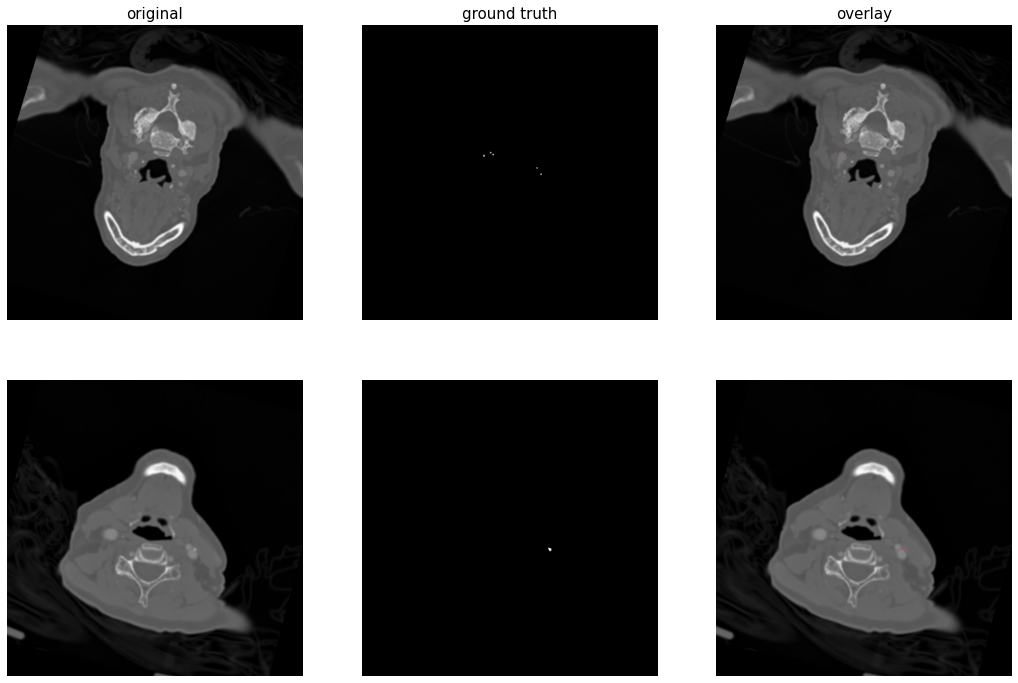

In [15]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=2, figsize=6)

In [16]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-11-02 20:24:37.330535: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-02 20:24:37.333353: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-02 20:24:37.343361: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-11-02 20:24:37.346343: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-02 20:24:37.348810: I tensorflow/core

In [17]:
model, history = C.Helper.train_unet(train_gen, X_train_set, y_train_set, X_val, y_val, model, steps_per_epoch=len(X_train) // 2,epochs=200)

2023-11-02 20:24:38.116236: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-02 20:24:38.136753: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-11-02 20:24:39.483510: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-11-02 20:24:40.831449: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-11-02 20:24:42.470797: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-11-02 20:24:42.470820: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-11-02 20:24:42.471654: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-02 20:24:43.650373: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-11-02 20:24:45.001037: I tensorflow/stream_exec

219/219 [==============================] - 127s 316ms/step - loss: 0.0157 - iou: 0.0098 - iou_thresholded: 0.0186 - val_loss: 0.0018 - val_iou: 0.0015 - val_iou_thresholded: 0.0016
Epoch 2/200
219/219 [==============================] - 21s 98ms/step - loss: 0.0021 - iou: 0.0086 - iou_thresholded: 0.0183 - val_loss: 0.0016 - val_iou: 0.0012 - val_iou_thresholded: 0.0016
Epoch 3/200
219/219 [==============================] - 22s 99ms/step - loss: 0.0018 - iou: 0.0079 - iou_thresholded: 0.0173 - val_loss: 0.0011 - val_iou: 0.0027 - val_iou_thresholded: 0.0016
Epoch 4/200
219/219 [==============================] - 21s 98ms/step - loss: 0.0013 - iou: 0.0102 - iou_thresholded: 0.0186 - val_loss: 0.0011 - val_iou: 0.0113 - val_iou_thresholded: 0.0016
Epoch 5/200
219/219 [==============================] - 22s 99ms/step - loss: 0.0010 - iou: 0.0187 - iou_thresholded: 0.0179 - val_loss: 7.2981e-04 - val_iou: 0.0251 - val_iou_thresholded: 0.0016
Epoch 6/200
219/219 [==============================

219/219 [==============================] - 22s 99ms/step - loss: 4.5061e-04 - iou: 0.2074 - iou_thresholded: 0.2762 - val_loss: 3.7971e-04 - val_iou: 0.2329 - val_iou_thresholded: 0.3757
Epoch 43/200
219/219 [==============================] - 21s 98ms/step - loss: 4.2228e-04 - iou: 0.2305 - iou_thresholded: 0.3096 - val_loss: 3.5344e-04 - val_iou: 0.2881 - val_iou_thresholded: 0.4238
Epoch 44/200
219/219 [==============================] - 22s 99ms/step - loss: 4.1967e-04 - iou: 0.2303 - iou_thresholded: 0.3016 - val_loss: 3.8293e-04 - val_iou: 0.2095 - val_iou_thresholded: 0.3165
Epoch 45/200
219/219 [==============================] - 21s 98ms/step - loss: 4.1795e-04 - iou: 0.2290 - iou_thresholded: 0.2965 - val_loss: 3.3419e-04 - val_iou: 0.2661 - val_iou_thresholded: 0.3813
Epoch 46/200
219/219 [==============================] - 22s 99ms/step - loss: 4.2584e-04 - iou: 0.2352 - iou_thresholded: 0.3116 - val_loss: 5.7168e-04 - val_iou: 0.1614 - val_iou_thresholded: 0.3166
Epoch 47/200


219/219 [==============================] - 22s 99ms/step - loss: 3.0348e-04 - iou: 0.3377 - iou_thresholded: 0.4490 - val_loss: 2.3961e-04 - val_iou: 0.3574 - val_iou_thresholded: 0.5494
Epoch 84/200
219/219 [==============================] - 22s 99ms/step - loss: 3.2044e-04 - iou: 0.3372 - iou_thresholded: 0.4499 - val_loss: 2.8948e-04 - val_iou: 0.3019 - val_iou_thresholded: 0.5368
Epoch 85/200
219/219 [==============================] - 21s 98ms/step - loss: 2.9947e-04 - iou: 0.3492 - iou_thresholded: 0.4656 - val_loss: 2.3994e-04 - val_iou: 0.3965 - val_iou_thresholded: 0.5621
Epoch 86/200
219/219 [==============================] - 22s 99ms/step - loss: 2.8885e-04 - iou: 0.3619 - iou_thresholded: 0.4788 - val_loss: 2.9511e-04 - val_iou: 0.3380 - val_iou_thresholded: 0.4907
Epoch 87/200
219/219 [==============================] - 21s 98ms/step - loss: 2.9744e-04 - iou: 0.3477 - iou_thresholded: 0.4575 - val_loss: 2.4465e-04 - val_iou: 0.3677 - val_iou_thresholded: 0.5599
Epoch 88/200


Epoch 124/200
219/219 [==============================] - 22s 99ms/step - loss: 2.8381e-04 - iou: 0.3697 - iou_thresholded: 0.4785 - val_loss: 2.7864e-04 - val_iou: 0.3350 - val_iou_thresholded: 0.4976
Epoch 125/200
219/219 [==============================] - 21s 98ms/step - loss: 2.7960e-04 - iou: 0.3770 - iou_thresholded: 0.4889 - val_loss: 3.2783e-04 - val_iou: 0.3256 - val_iou_thresholded: 0.4776
Epoch 126/200
219/219 [==============================] - 22s 99ms/step - loss: 2.5943e-04 - iou: 0.3932 - iou_thresholded: 0.5077 - val_loss: 2.4996e-04 - val_iou: 0.3491 - val_iou_thresholded: 0.5383
Epoch 127/200
219/219 [==============================] - 21s 98ms/step - loss: 2.7705e-04 - iou: 0.3690 - iou_thresholded: 0.4793 - val_loss: 2.5162e-04 - val_iou: 0.3624 - val_iou_thresholded: 0.5460
Epoch 128/200
219/219 [==============================] - 22s 99ms/step - loss: 2.5915e-04 - iou: 0.4003 - iou_thresholded: 0.5148 - val_loss: 2.7772e-04 - val_iou: 0.3345 - val_iou_thresholded: 0.

Epoch 165/200
219/219 [==============================] - 22s 99ms/step - loss: 6.5237e-04 - iou: 0.1684 - iou_thresholded: 0.2333 - val_loss: 7.0253e-04 - val_iou: 0.0618 - val_iou_thresholded: 0.0061
Epoch 166/200
219/219 [==============================] - 21s 98ms/step - loss: 6.9545e-04 - iou: 0.1110 - iou_thresholded: 0.1336 - val_loss: 7.9606e-04 - val_iou: 0.0398 - val_iou_thresholded: 0.0400
Epoch 167/200
219/219 [==============================] - 22s 99ms/step - loss: 5.0704e-04 - iou: 0.2139 - iou_thresholded: 0.3107 - val_loss: 2.8841e-04 - val_iou: 0.3372 - val_iou_thresholded: 0.5468
Epoch 168/200
219/219 [==============================] - 22s 99ms/step - loss: 5.5208e-04 - iou: 0.2061 - iou_thresholded: 0.2773 - val_loss: 3.0281e-04 - val_iou: 0.3575 - val_iou_thresholded: 0.5288
Epoch 169/200
219/219 [==============================] - 21s 98ms/step - loss: 4.3019e-04 - iou: 0.2516 - iou_thresholded: 0.3566 - val_loss: 2.9967e-04 - val_iou: 0.3115 - val_iou_thresholded: 0.

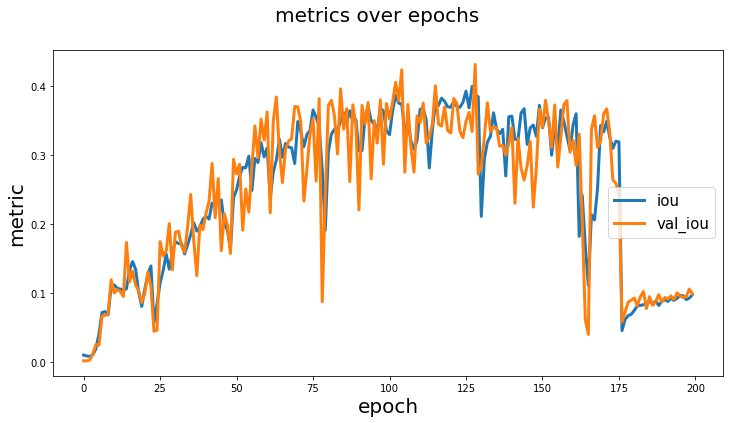

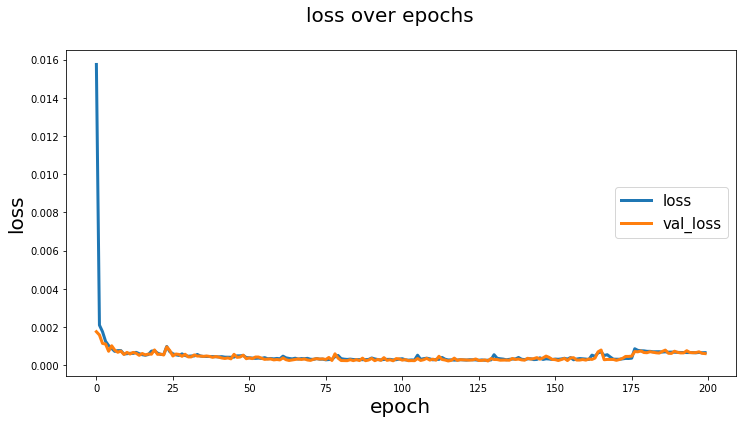

In [18]:
C.Helper.visualize_graph(history)

In [19]:
y_pred = C.Helper.prediction(X_test, model)

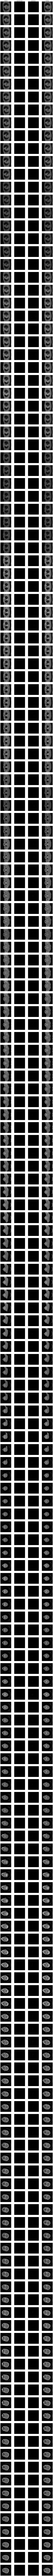

In [20]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [21]:
C.Helper.evaluate(X_test, y_test, model)

104/104 [==============================] - 23s 221ms/step - loss: 1.8872e-04 - iou: 0.0173 - iou_thresholded: 0.1828


In [22]:
# feed slice test full